In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
img = Image.open('assets/image.png')

# A default image preview

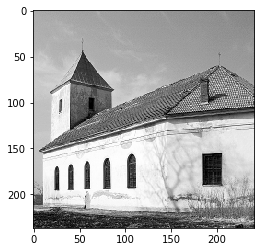

In [3]:
plt.imshow(img, cmap='gray')

# Prepare the image for convolutions

In [4]:
def convolution2d(image, kernel):
    m, n = kernel.shape
    if (m != n):
        raise Exception('Kernel shape should be a square')
        
    y, x = image.shape
    y = y - m + 1
    x = x - m + 1
    new_image = np.zeros((y,x))
    for i in range(y):
        for j in range(x):
            new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel)
    return new_image

In [5]:
# convert image into a numpy array
img = np.asarray(img)

## Apply Gaussian edge detection kernel

In [6]:
gaussian_edge_detection_kernel = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
])

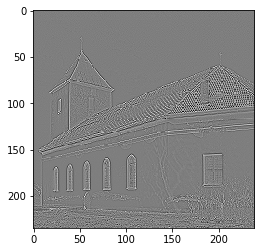

In [7]:
gaussian_edge_img = convolution2d(img, gaussian_edge_detection_kernel)
plt.imshow(gaussian_edge_img, cmap='gray')

Gaussian kernel is very sensitive to noises. Try to apply Gaussian blur filter to reduce noise.

In [8]:
def gaussian_blur_kernel(size):
    """
    A Gaussian kernel that should be applied to an image for a blurring effect.
    """
    size = int(size)
    x, y = np.mgrid[-size:size+1, -size:size+1]
    g = np.exp(-(x**2/float(size)+y**2/float(size)))
    return g / g.sum()

In [9]:
gaussian_kernel = gaussian_blur_kernel(5)

In [10]:
gaussian_blur_img = convolution2d(img, gaussian_kernel)

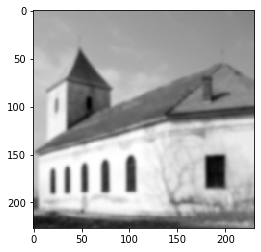

In [11]:
plt.imshow(gaussian_blur_img, cmap='gray')

Apply the convolution kernel again to blurred image and compare results

In [12]:
gaussian_edge_blur_img = convolution2d(gaussian_blur_img, gaussian_edge_detection_kernel)

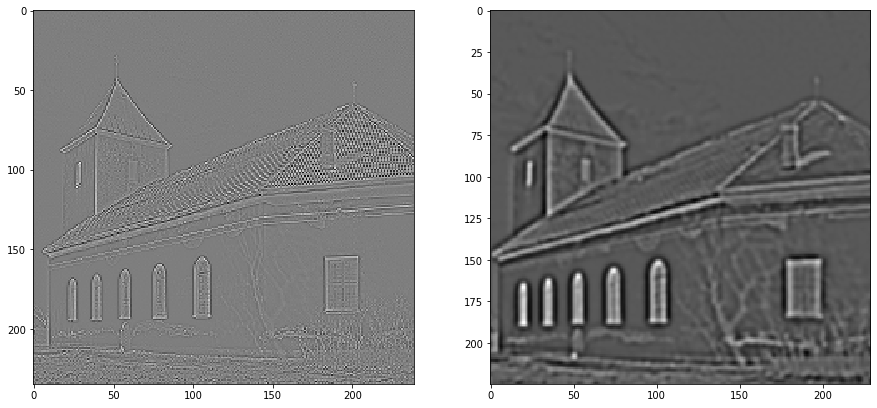

In [13]:
# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(gaussian_edge_img, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(gaussian_edge_blur_img, cmap='gray')

plt.show(block=True)

## Apply Sobel edge detection kernel

In [14]:
sobel_edge_detection_kernel_y = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])
sobel_edge_detection_kernel_x = np.array([
    [-1, 0, -1],
    [-2, 0, -2],
    [-1, 0, -1]
])

In [15]:
sobel_y_img = convolution2d(img, sobel_edge_detection_kernel_y)
sobel_x_img = convolution2d(img, sobel_edge_detection_kernel_x)
sobel_sum_img = np.add(sobel_x_img, sobel_y_img)

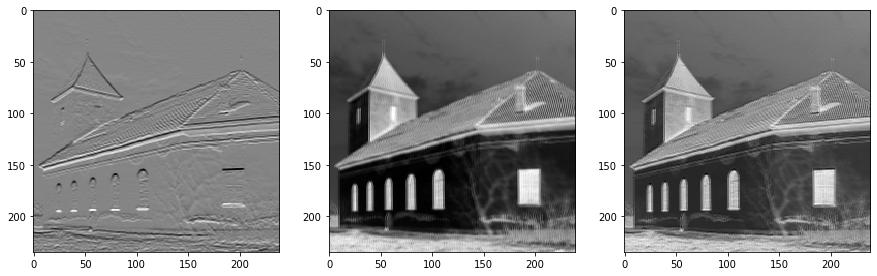

In [16]:
# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,3,1)
plt.imshow(sobel_y_img, cmap='gray')

# display the new image
fig.add_subplot(1,3,2)
plt.imshow(sobel_x_img, cmap='gray')

# display the new image
fig.add_subplot(1,3,3)
plt.imshow(sobel_sum_img, cmap='gray')

plt.show(block=True)

## Apply all together

In [17]:
full_y_img = convolution2d(gaussian_edge_blur_img, sobel_edge_detection_kernel_y)
full_x_img = convolution2d(gaussian_edge_blur_img, sobel_edge_detection_kernel_x)
full_sum_img = np.add(full_y_img, full_x_img)

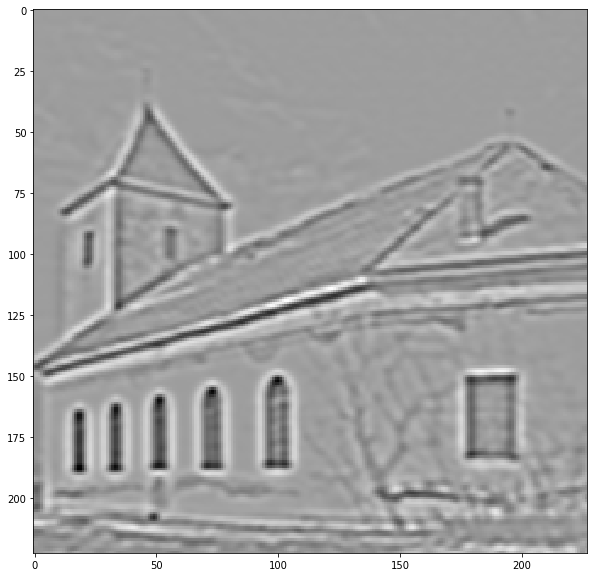

In [18]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

plt.imshow(full_sum_img, cmap='gray')